# HW3 - Exploratory Data Analysis, Visualization, Hypothesis Testing

In this homework, we are going to pick up exactly where we left off last time. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In this assignment, we will be using the same diabetes dataset as before. Just like last time, create a data folder and place the data inside. Add a `.gitignore` file just like last time to prevent yourself from committing the file:

In [3]:
diabetes_df = pd.read_csv('./data/diabetic_data.csv')

# Finding outliers

During exploratory data analysis, it is generally important to find out if there are any outliers in the data. Outliers can greatly affect certain estimates such as means and standard deviations. In addition, certain types of statistical models do not work well in the presence of outliers.

The statistical way of defining an outlier is generally to see whether it falls outside of the following range:

$$(Q_1 - 1.5 * IQR, Q_3 + 1.5 * IQR)$$,

where $Q_1$ is the 25th percentile, $Q_3$ is the 75th percentile, and the $IQR$ is the difference between them. 

The columns that you will be working with for the following exercise are as follows:

 * `num_lab_procedures`
 * `num_procedures`
 * `num_medications`
 * `number_outpatient`
 * `number_emergency`
 * `number_inpatient`
 * `number_diagnoses`

## For each of the above columns, plot a histogram of the values [5 pts]

You can use any method that you would like

C:\Users\Jiaxu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E627EF0C48>,
      dtype=object)

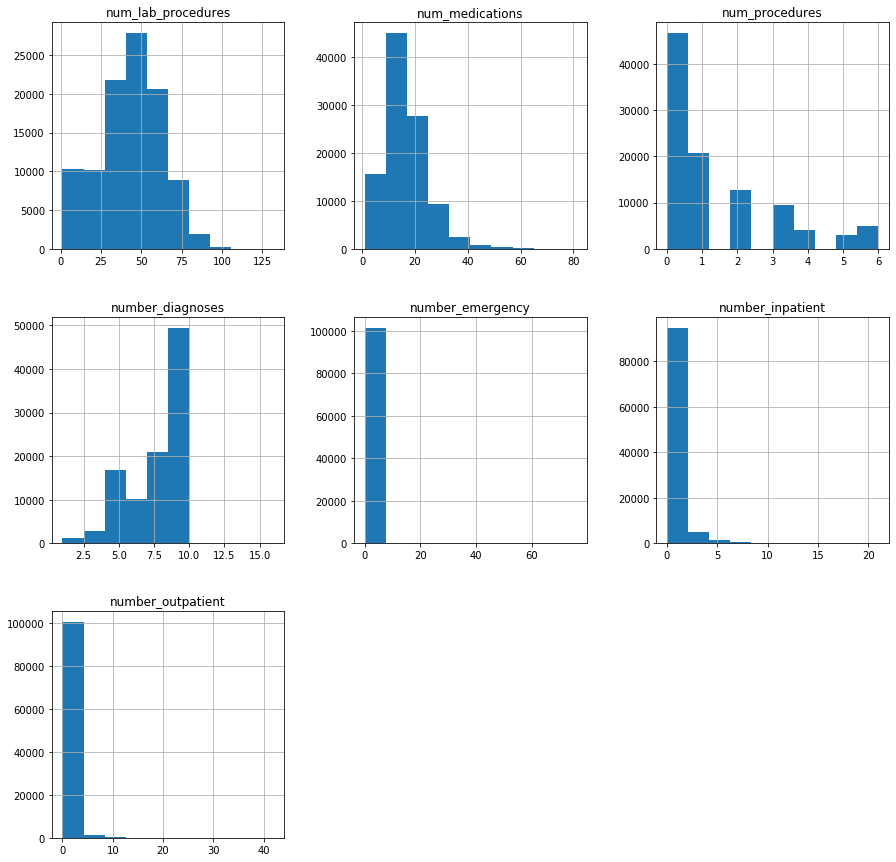

In [22]:
columns=['num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
diabetes_df[columns].hist(ax=ax)

## Find the encounter ids which are outliers in each of the columns listed above [15 pts]

> In order to do this, first compute the bounds for outliers as noted above for each of the columns necessary. Then, find the `encounter_id`s which have outlier values for each column and display them.


In [23]:
IQR=diabetes_df[columns].quantile(0.75)-diabetes_df[columns].quantile(0.25);
bounds=[diabetes_df[columns].quantile(0.25)-1.5*IQR,diabetes_df[columns].quantile(0.75)+1.5*IQR]

outliers=[]
encounter_ids=pd.DataFrame()
for col in columns:
    outliers.append(diabetes_df[(diabetes_df[col] < bounds[0][col]) | (diabetes_df[col] > bounds[1][col])])
    
encounter_id=pd.concat(outliers).drop_duplicates(subset=['encounter_id'])

In [24]:
encounter_id

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
336,3331848,442341,Caucasian,Male,[30-40),?,6,25,4,12,...,No,Up,No,No,No,No,No,Ch,Yes,NO
623,4936380,533412,AfricanAmerican,Female,[60-70),?,6,25,7,8,...,No,Steady,No,No,No,No,No,No,Yes,NO
823,6479016,20676798,Caucasian,Male,[80-90),?,6,1,7,7,...,No,No,No,No,No,No,No,No,Yes,>30
830,6494982,76825836,AfricanAmerican,Male,[50-60),?,6,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
1079,7978098,22942566,AfricanAmerican,Female,[50-60),?,6,6,17,10,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101297,437391758,147522047,Caucasian,Female,[80-90),?,1,3,7,7,...,No,No,No,No,No,No,No,Ch,Yes,>30
101557,440860496,121636517,Caucasian,Male,[70-80),?,1,23,7,10,...,No,Steady,No,No,No,No,No,No,Yes,NO
101603,441510854,173994386,Caucasian,Female,[90-100),?,1,3,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101646,442098572,174017957,Caucasian,Male,[70-80),?,1,1,7,4,...,No,Steady,No,No,No,No,No,No,Yes,NO


## Using the `seaborn.catplot` function, create a plot according to the following specifications:

 * Each of the columns listed above should be a subplot
 * For each, you should plot a boxplot
 * Each row of subplots should have 2 plots (except for the last one, since there are an odd number of plots)
 * Each row should not share a y-axis
 
You can find the documentation for the catplot function [here](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

#### Create a subset of the diabetes dataframe that just contains those columns [2.5]

In [25]:
diabetes_df[columns]

,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,41,0,1,0,0,0,1
1,59,0,18,0,0,0,9
2,11,5,13,2,0,1,6
3,44,1,16,0,0,0,7
4,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...
101761,51,0,16,0,0,0,9
101762,33,3,18,0,0,1,9
101763,53,0,9,1,0,0,13
101764,45,2,21,0,0,1,9


#### Currently, the dataframe is in wide-form. Instead, change the dataframe so that the category name is in one column, and all the values are stacked in another (melted) [7.5]

In [26]:
diabetes_df[columns].melt()

,variable,value
0,num_lab_procedures,41
1,num_lab_procedures,59
2,num_lab_procedures,11
3,num_lab_procedures,44
4,num_lab_procedures,51
...,...,...
712357,number_diagnoses,9
712358,number_diagnoses,9
712359,number_diagnoses,13
712360,number_diagnoses,9


#### Use the catplot function to plot the graph. Make sure to adhere to each of the conditions listed above [10]

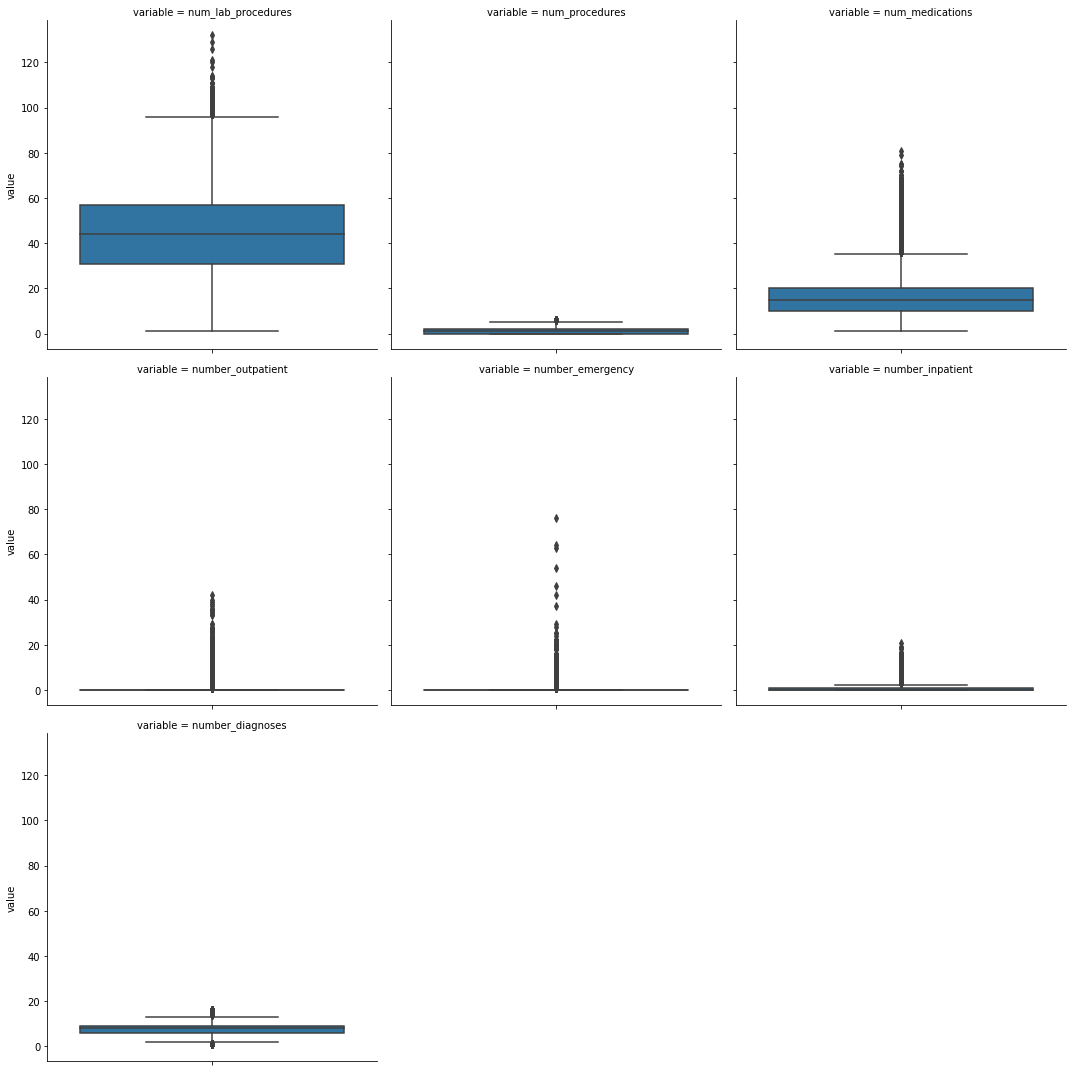

In [27]:
graph = sns.catplot(y='value', data=diabetes_df[columns].melt(),col='variable',kind='box',col_wrap=3)

## Making cosmetic changes and Checking the boxplot outlier implementation:

The *whiskers* of a boxplot often extend to the bounds for outliers. However, some boxplot implementations choose other bounds for the whiskers, such as the maximum and minimum values, or a set percentile (10th, 90th, etc). In this next step, you will utilize `matplotlib`'s `Axes` objects to change the subplots in some way.

Recall that Seaborn (and many other plotting libraries) are built off of `matplotlib` objects. Therefore, you can always modify these plots with all of the custom functions that are available in `matplotlib`'s interface. To access the `Axes` objects of your plot, save your plot to a variable, and call 

`variable.axes`

You should see an array of `Axes` objects appear. These will be objects that you set attributes of in order to modify your plots.



Note: You may have to copy your plot code from above into another cell because of the way jupyter handles plots.

### Clean up the titles for each graph so that they are either the name of the columns or a cleaner representation [10 pts]


For example, rather than `variable = number_emergency`, you can set it to `number_emergency`, or `Number of Emergency Visits`.

you can do this by accessing the `Axes`, and using `set(title =)`. 

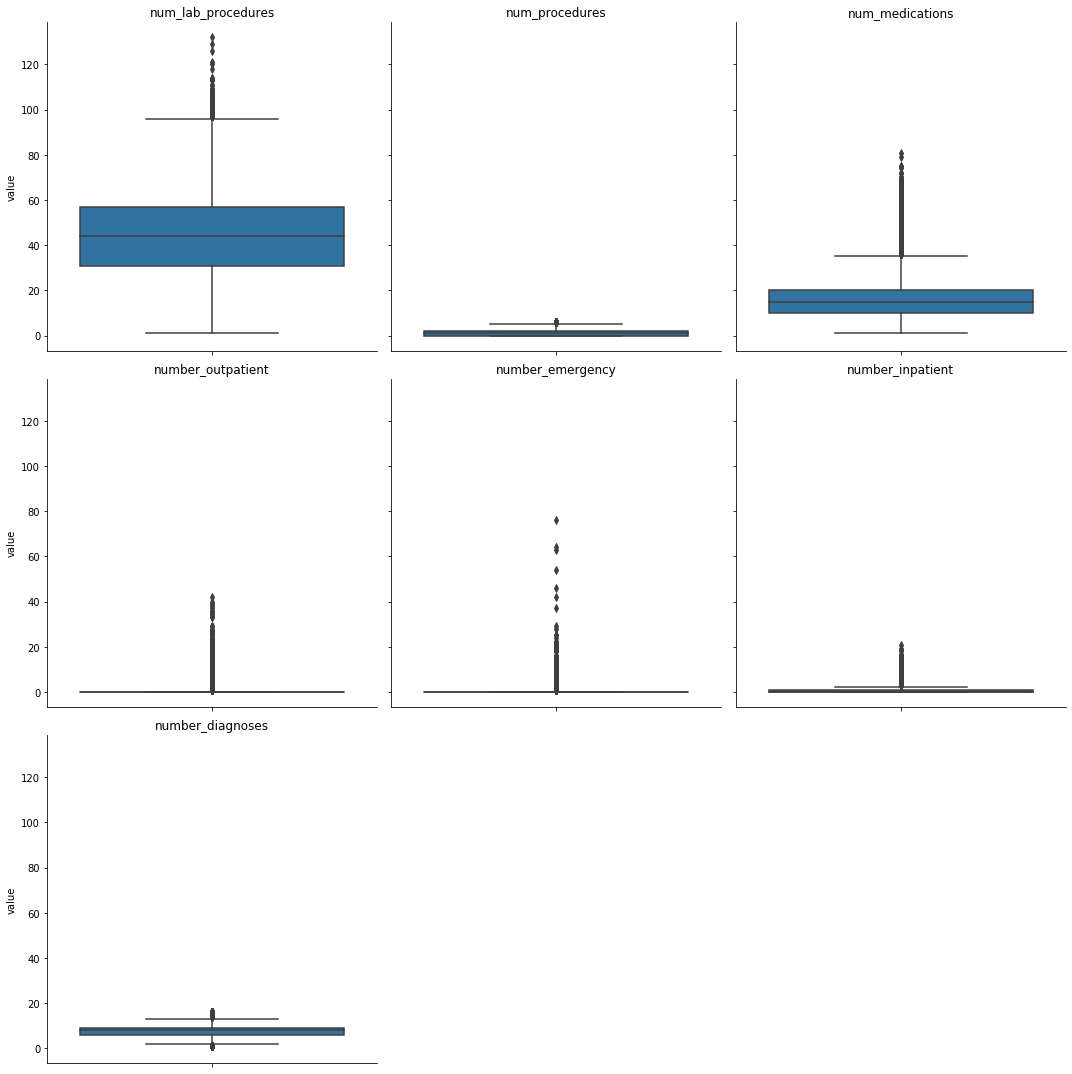

In [31]:
clean_graph = sns.catplot(y='value', data=diabetes_df[columns].melt(),col='variable',kind='box',col_wrap=3)
axes_plot=clean_graph.axes
for i in range(len(columns)):
    axes_plot[i].set(title=columns[i])

### Add dotted lines at each of the upper and lower outlier bounds. Pick a non-default color and linestyle of your choice for these [10 pts]

In [1]:
dot_graph = sns.catplot(y='value', data=diabetes_df[columns].melt(),col='variable',kind='box',col_wrap=3,sharey=False)
dot_graph.set_xticklabels(rotation=90)
for i in range(len(columns)):
    dot_graph.axes[i].set(title=columns[i])
    dot_graph.axes[i].axhline(y=bounds[0][i],color='red',linestyle=':')
    dot_graph.axes[i].axhline(y=bounds[1][i],color='blue',linestyle=':')

NameError: name 'sns' is not defined

To check if seaborn boxplots use the same outlier method for determining the bound of the whiskers, add a dotted line at the upper and lower bound of each of these columns with a non-default color and linestyle and see if they line up with the seaborn boxplot whiskers

# Hypothesis testing

In the [paper that produced the dataset](https://www.hindawi.com/journals/bmri/2014/781670/), the authors perform a series of hypothesis tests. However, as is common in the literature, they often do not provide confidence intervals or explain which hypothesis tests were performed. Here, we want to reproduce the results of the paper, but to generate confidence intervals so we have a better sense of the uncertainty behind their results.

### Test: 

> When an HbA1c was not obtained, 42.5% of patients had a medication change during the hospitalization, whereas those providers who ordered the test appear to have been somewhat more responsive as determined by changes in medication (55.0%, P < 0.001).

Here, we can represent this statement as the following hyptothesis test:

$$ H_0: p_1 = p_2 $$
$$ H_1: p_1 \neq p_2 $$

Equivalently:

$$ H_0: p_1 - p_2 = 0$$
$$ H_1: p_1 - p_2 \neq 0$$


where p is the probability that a provider changed the medication (given by the `change` column)

In order to test the equality of two proportions, the Z-test for 2 proportions is often used. In this setting, the test statistic is distributed according to the standard normal distribution: N(0, 1)

$$ Z_t = \frac{\hat{p_1} - \hat{p_2}}{\hat{\sigma_D}} $$

Here, $\hat{p_1}$ and $\hat{p_2}$ are the observed proportions of a provider changing a medication.

Here, we will assume that the two populations have the same variance, meaning we can use what is known as a *pooled standard error*. The details of this are outside the scope of this course. 

$$\hat{p} = \frac{n_1\hat{p_1} + n_2\hat{p_2}}{n_1 + n_2} $$

$$\hat{\sigma_D} = \sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}$$

where $n_1$ and $n_2$ are the sample sizes for groups 1 and 2, respectively

In this case, the assumptions for the test are as follows:

 * The two populations are independent
 * They are sampled at random
 * There is enough data such that
     * $np > 10$
     * $n(1-p) > 10$
     
which we can assume holds in this case.

Compute $\hat{p_1}$ and $\hat{p_2}$ by checking the proportion of the time that the `change` column is equal to `Ch` when the A1C column is *not* None ($\hat{p_1}$) versus when it is None ($\hat{p_2}$). You can use `pd.isnull()` to check where a column is missing. Note that the numbers may be slightly off of the numbers from the paper due to the way that they remove certain encounters

In [17]:
p1=len(diabetes_df[(diabetes_df['change']=='Ch') & (diabetes_df['A1Cresult']!='None')])/len(diabetes_df[(diabetes_df['A1Cresult']!='None')])
p2=len(diabetes_df[(diabetes_df['change']=='Ch') & (diabetes_df['A1Cresult']=='None')])/len(diabetes_df[(diabetes_df['A1Cresult']=='None')])
print('p1_observed = '+ str(p1))
print('p2_observed = '+ str(p2))

p1_observed = 0.5576448466329769
p2_observed = 0.44273611176664934


#### Next, compute the value of the test statistic: [15 pts]

Because the Z-statistic is distributed according to the standard Normal Distribution, we can find the p-value by using the `norm.cdf()` command. Remember, the p-value is just the probability that we would see a test-statistic as extreme or more extreme given that the null hypothesis was true.

Because our alternative hypothesis is 2-sided, we can compute the p-value as follows:

`norm.cdf(z) * 2`

This is because we allow for our test statistic to be either greater than OR less than the critical values.

In [18]:
n1=len(diabetes_df[(diabetes_df['A1Cresult']!='None')])
n2=len(diabetes_df[(diabetes_df['A1Cresult']=='None')])
p=(n1*p1+n2*p2)/(n1+n2)
sigma_D=np.sqrt(p*(1.0-p)*(1.0/n1+1.0/n2))
Z_t=(p1-p2)/sigma_D
print('Z_t = '+ str(Z_t))

Z_t = 27.438587305291865


#### Compute the p-value [10 pts]

In [19]:
(1-norm.cdf(Z_t))*2
print('p_value = '+str((1-norm.cdf(Z_t))*2))

p_value = 0.0


#### Verify using the following method that your test statistic and p-value match [5 pts]

In [20]:
import statsmodels.api as sm
count = np.array([p1*n1, p2*n2])
nobs = np.array([n1, n2])
# fill in the code here:
z_score, p_value = sm.stats.proportions_ztest(count, nobs) 
print('z_score = '+str(z_score))
print('p_value = '+str(p_value))
# Resource: http://knowledgetack.com/python/statsmodels/proportions_ztest/

z_score = 27.438587305291865
p_value = 9.506951357707911e-166


#### An aside:

To find the value of the test statistic that would give us exactly 0.05 significance, we can use:

`normQuantile(0.025)`
and
`normQuantile(0.975)`

(where the `normQuantile` function (which in scipy is `norm.ppf`) tells us what at what value the Cumulative Distribution Function is equal to the argument. The quantile function is the inverse of the Cumulative Distribution Function)


As this gives us half of the 0.05 significance level on either side. 

For one sided tests, this would just be 

`normQuantile(0.05)` 
or
`normQuantile(0.95)`
depending on the direction of the alternative hypothesis

### Confidence Interval

Next, we're going to construct a confidence interval. The p-value just tells us that it is unlikely, given that the null hypothesis is true, that we would see data as extreme or more extreme than what we saw. In other words, if there were no difference in the way that physicians changed diabetes patients' medications depending on whether they tested for A1C or not, then it would be highly unlikely that we would see a pattern as extreme as we see in the data. 

However, this does not tell us *anything* about how different the values actually are. To generate a 95% confidence interval, we take the *observed* difference in proportions and construct it in the following way:

$\hat{p_1} - \hat{p_2} \pm Z_* \sigma_D$

Where $Z_*$ here is `normQuantile(0.975)` or `normQuantile(0.025)` (the only difference is the sign change)

### Find the confidence interval for this test [10 pts]

This tells us that in a specific example of this procedure being run, there is a 95% probability that the true difference between the means falls between the two bounds. Remember that this says nothing about whether the true difference is in these bounds or not!

In [21]:
lower_bound=p1-p2+norm.ppf(0.025)*sigma_D
upper_bound=p1-p2+norm.ppf(0.975)*sigma_D
print('95% confidence interval is ['+str(lower_bound)+','+str(upper_bound)+']')

95% confidence interval is [0.10670069633499876,0.12311677339765628]
